In [1]:
#Block for imports and other setting that will be required for the code to run
import os
import sys
import re
import time
import datetime
import random
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df1 = pd.read_csv('new_iso1_group_names.csv',)

In [12]:
df1.head()

,Blend Number,Original Blend Name,Blend Type,Replacement Level,Group_names,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g)
0,0,100% PC,Other,0,X,100,0,0,0,0,0,0,0,0,0,323.16
1,1,80% PC + 20% GPP,Binary,20,Group_1_PC_GP,80,20,0,0,0,0,0,0,0,0,297.77
2,2,70% PC + 30% GPP,Binary,30,Group_1_PC_GP,70,30,0,0,0,0,0,0,0,0,311.40
3,3,60% PC + 40% GPP,Binary,40,Group_1_PC_GP,60,40,0,0,0,0,0,0,0,0,265.35
4,4,50% PC + 50% GPP,Binary,50,Group_1_PC_GP,50,50,0,0,0,0,0,0,0,0,225.05


Group_names
Group_5_3_PC_30      26
Group_8_3_PLC_30     23
Group_1_PC_GP         6
Group_3_PC_Q          6
Group_2_PLC_GPP       5
Group_4_PLC_Q         5
Group_6_3_PC_40       4
Group_7_3_PC_50       4
Group_9_3_PLC_40      4
Group_10_3_PLC_50     4
X                     3
Group_11_3_PC_10      1
Group_12_3_PC_20      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Group Names Distribution')

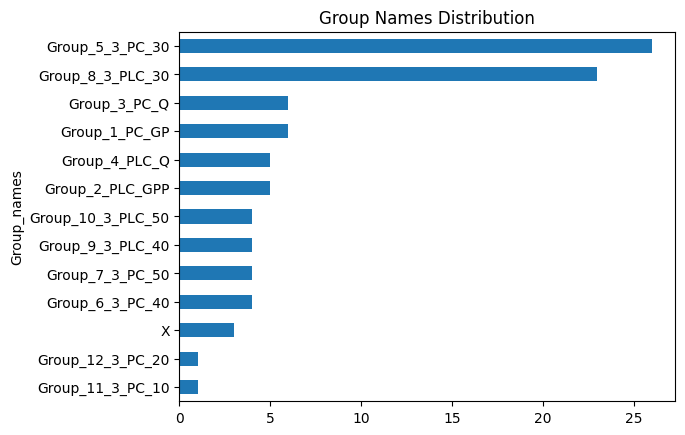

In [25]:
print(df1['Group_names'].value_counts())
df1['Group_names'].value_counts(ascending=True).plot(kind='barh').set_title('Group Names Distribution')

In [36]:
# Group by Group_names and calculate summary statistics for Cumulative Heat (J/g)
group_stats = df1.groupby("Group_names")["Cumulative Heat (J/g)"].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
print("Cumulative Heat Summary by Group_names:")
print(group_stats)


Cumulative Heat Summary by Group_names:
          Group_names  count        mean   median         std     min     max
0   Group_10_3_PLC_50      4  222.070000  221.350    3.731559  218.85  226.73
1    Group_11_3_PC_10      1  115.700000  115.700         NaN  115.70  115.70
2    Group_12_3_PC_20      1  149.980000  149.980         NaN  149.98  149.98
3       Group_1_PC_GP      6  246.138333  245.200   56.426974  160.64  311.40
4     Group_2_PLC_GPP      5  246.232000  251.610   33.929140  205.29  279.70
5        Group_3_PC_Q      6  229.538333  240.330   57.794374  145.39  295.44
6       Group_4_PLC_Q      5  256.506000  264.260   38.358624  200.71  297.95
7     Group_5_3_PC_30     26  176.442692  174.150   19.871955  143.78  222.55
8     Group_6_3_PC_40      4  198.137500  197.655    9.658493  186.85  210.39
9     Group_7_3_PC_50      4  226.557500  229.940    7.989712  214.68  231.67
10   Group_8_3_PLC_30     23  168.736957  159.340   20.570325  146.46  214.36
11   Group_9_3_PLC_40   

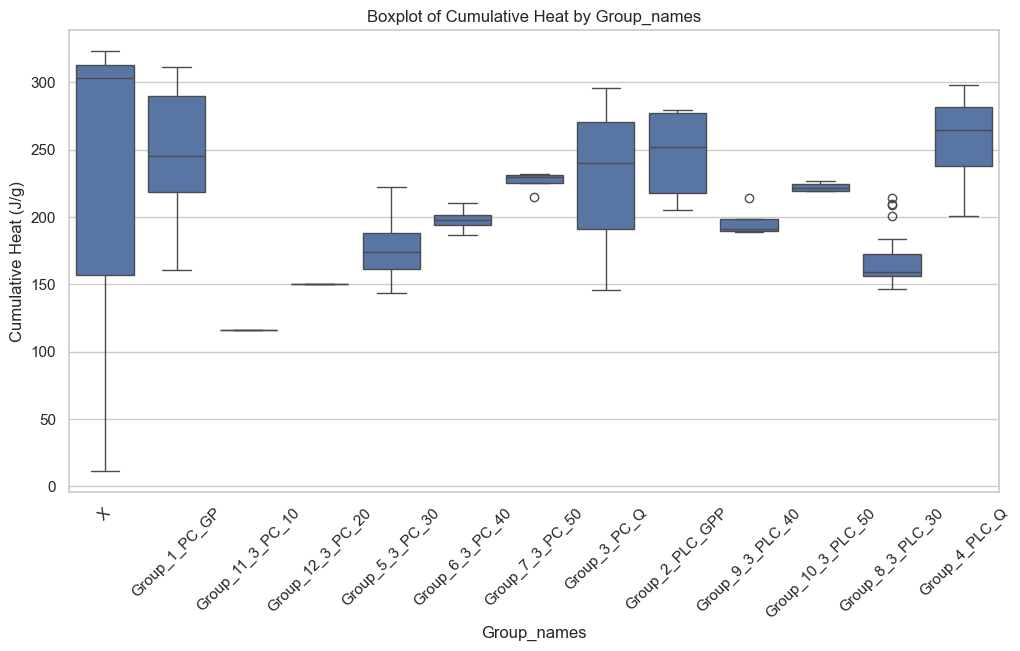

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="Group_names", y="Cumulative Heat (J/g)", data=df1)
plt.xticks(rotation=45)
plt.title("Boxplot of Cumulative Heat by Group_names")
plt.show()




C:\Users\raksh\AppData\Local\Temp\ipykernel_5444\2480172062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group_names", y="Cumulative Heat (J/g)", data=mean_heat, palette="viridis")


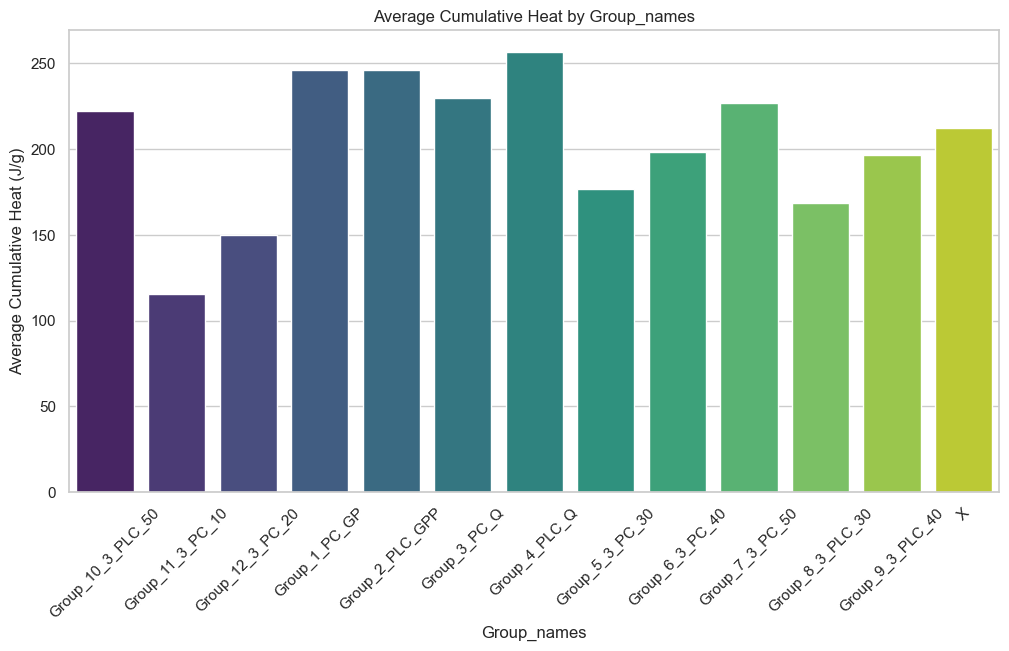

In [39]:
mean_heat = df1.groupby("Group_names")["Cumulative Heat (J/g)"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Group_names", y="Cumulative Heat (J/g)", data=mean_heat, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Cumulative Heat by Group_names")
plt.ylabel("Average Cumulative Heat (J/g)")
plt.show()


In [41]:
from scipy import stats

# Extract cumulative heat values for each group
groups = [group["Cumulative Heat (J/g)"].values for name, group in df1.groupby("Group_names")]

# Perform one-way ANOVA
anova_result = stats.f_oneway(*groups)
print("One-Way ANOVA Result:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")


One-Way ANOVA Result:
F-statistic: 5.07, p-value: 0.0000


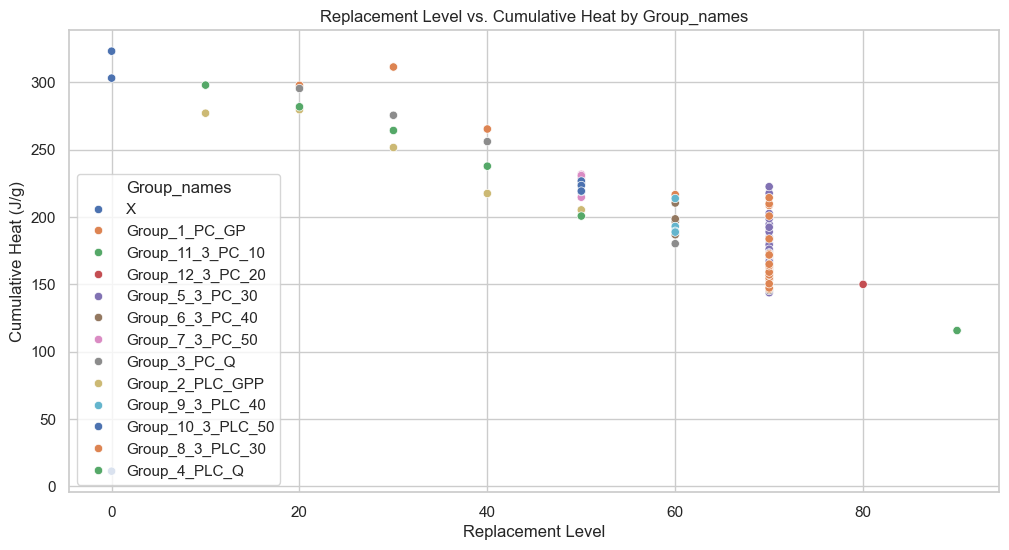

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Replacement Level", y="Cumulative Heat (J/g)", hue="Group_names", data=df1, palette="deep")
plt.title("Replacement Level vs. Cumulative Heat by Group_names")
plt.show()
